In [1]:
import io

from IPython import display
import numpy as np
from PIL import Image

import deep_dream

In [2]:
# Embed JPEGs into the notebook instead of the default of PNG, decreasing file size.

def show(img):
    if isinstance(img, np.ndarray):
        img = deep_dream.to_image(img)
    buf = io.BytesIO()
    img.save(buf, format='jpeg', quality=85)
    display.display(display.Image(data=buf.getvalue()))

In [3]:
cnn = deep_dream.CNN(deep_dream.BVLC_GOOGLENET, gpu=0)

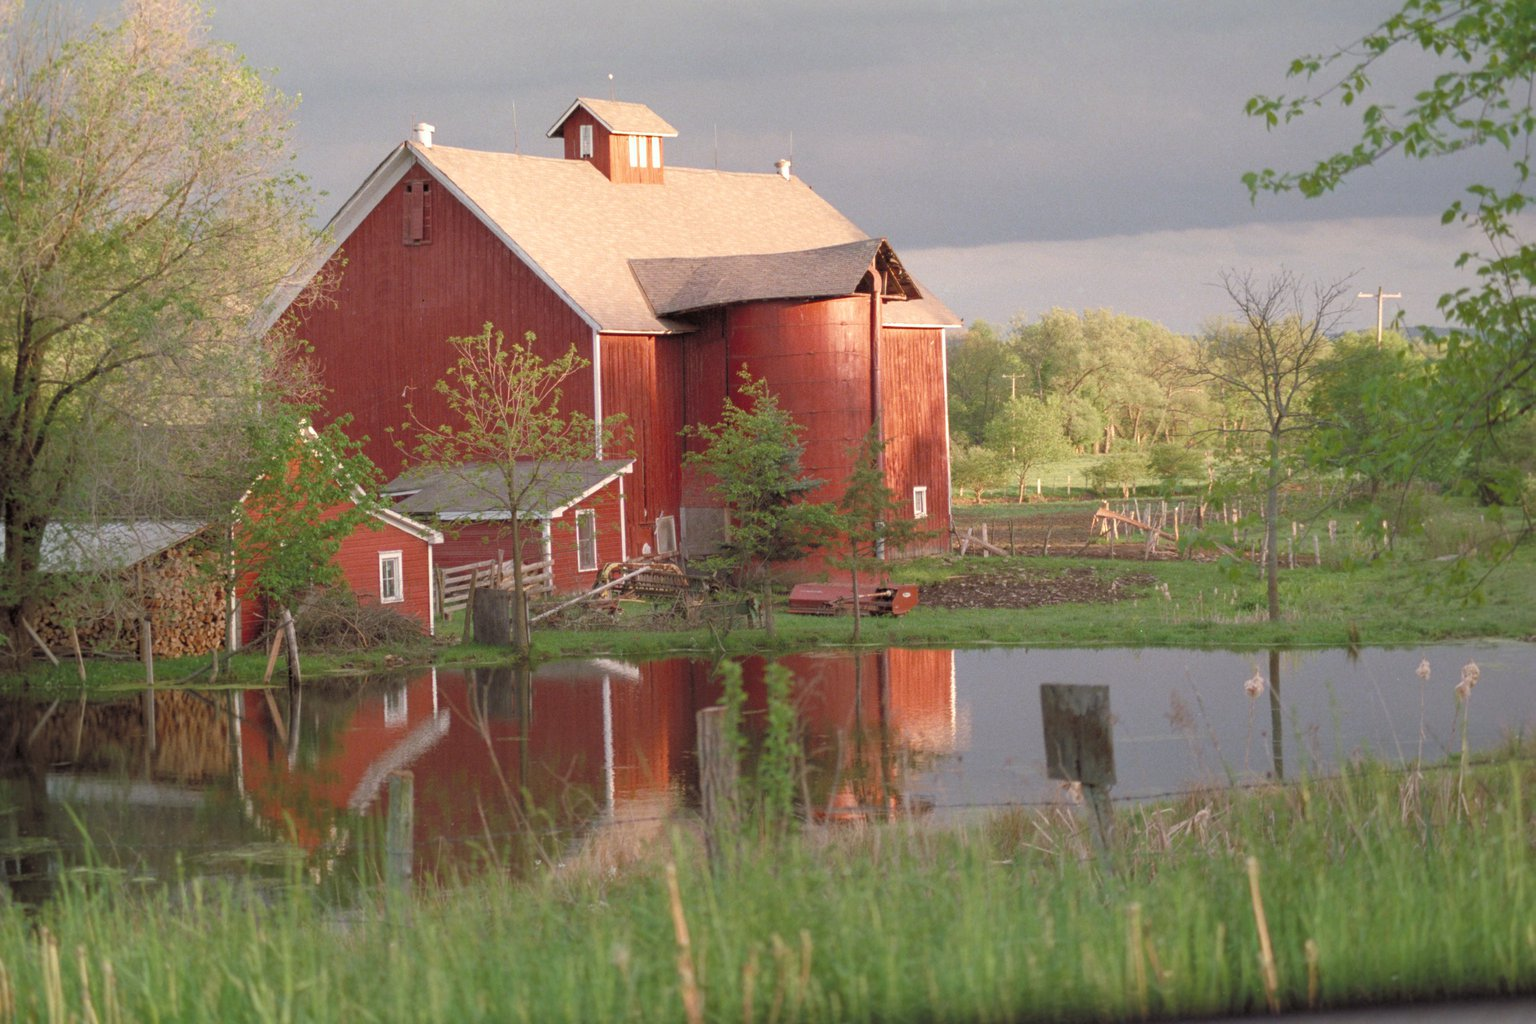

In [4]:
input_img = Image.open('kodim/img0022.jpg').resize((1536, 1024), Image.LANCZOS)
show(input_img)

100%|█████████████████████████████████████| 29.6M/29.6M [00:35<00:00, 937Kpix/s]


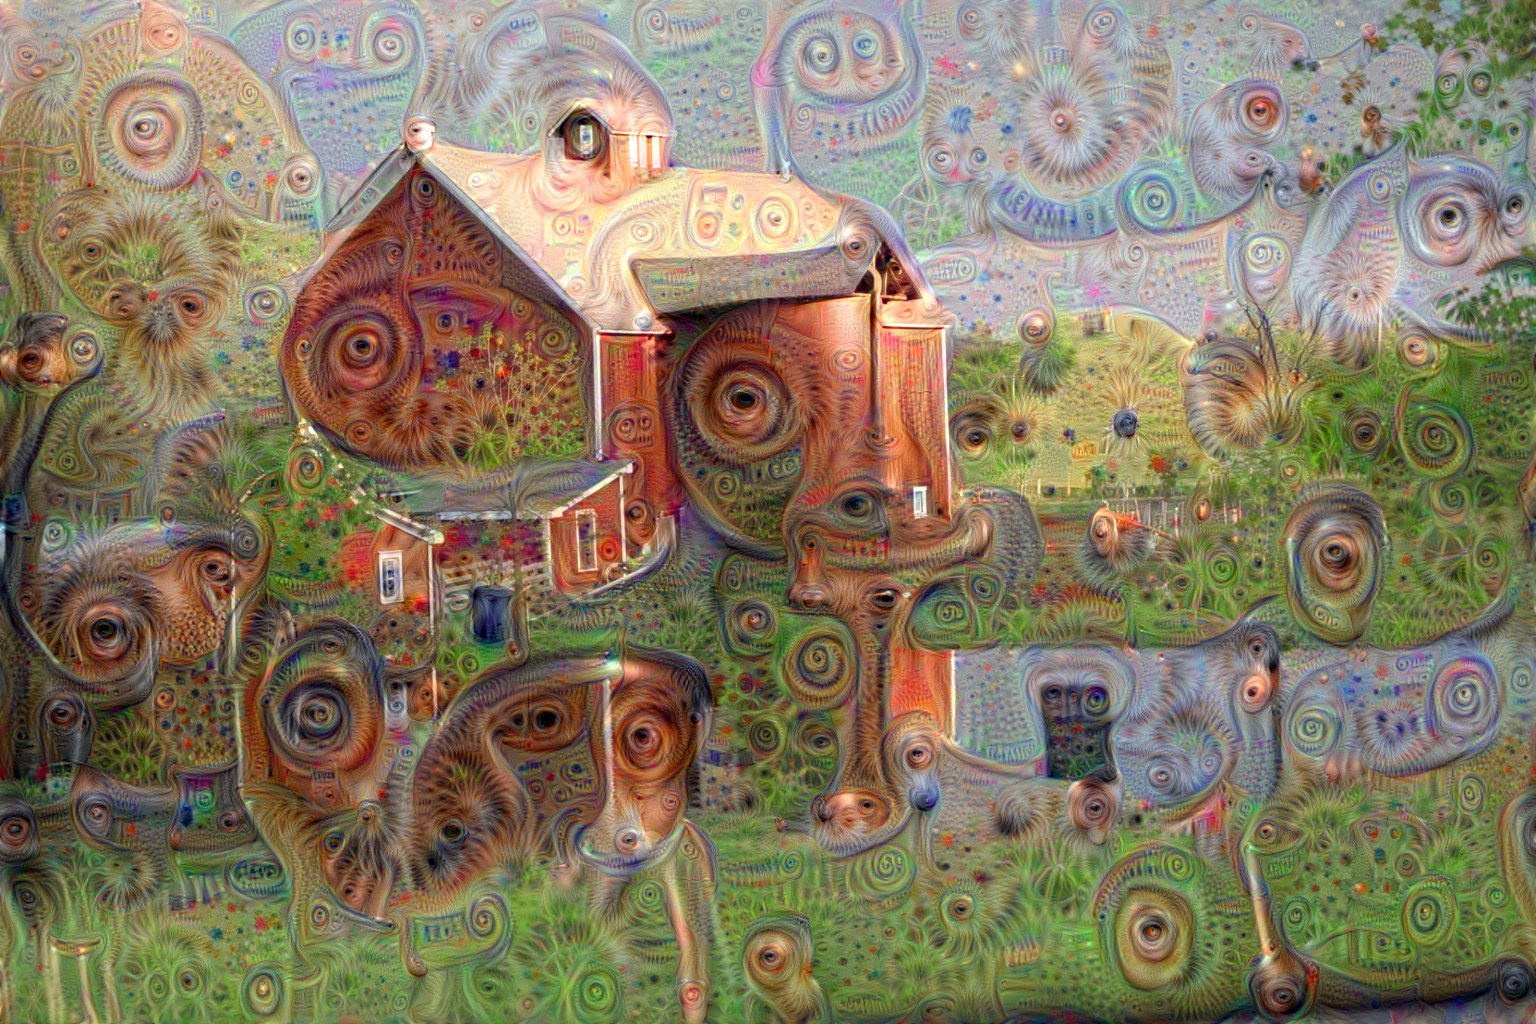

In [5]:
output_img = cnn.dream(input_img, {'inception_4a/pool_proj': 1},
                       scale=7*4, n=3, per_octave=8, step_size=1)
show(output_img)

In [6]:
output_img.save('output.jpg', quality=95)